In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/DATASET CHOICE A

/content/drive/MyDrive/DATASET CHOICE A


(60000, 784)
(60000,)
(10000, 784)
(10000,)


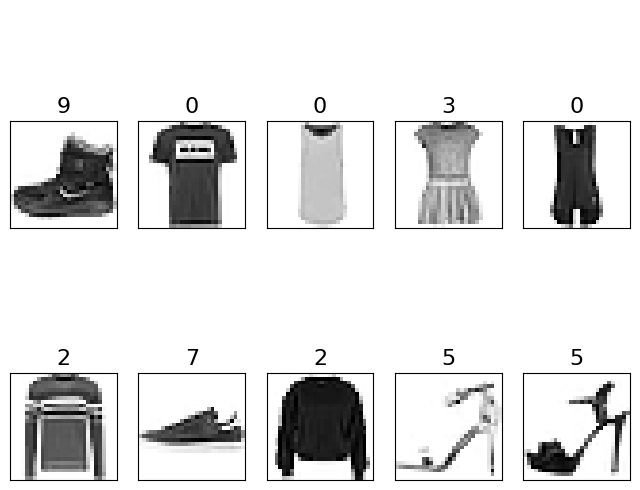

In [ ]:
# coding: utf-8
import matplotlib.pyplot as plt
from mnist import load_mnist
from multi_layer_net import *


# 0:Load MNIST data
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, one_hot_label=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

n_data = 10
row = 2
col = 5
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(8, 6))

fig.suptitle("MNIST data-set", fontsize=24, color='white')
for i, img in enumerate(x_train[:n_data]):
    _r = i // col
    _c = i % col
    ax[_r,_c].set_title(t_train[i], fontsize=16, color='black')
    ax[_r,_c].axes.xaxis.set_visible(False)
    ax[_r,_c].axes.yaxis.set_visible(False)
    ax[_r,_c].imshow(img.reshape(28, 28), cmap='Greys')

plt.show()
plt.close()

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
input_shape = (28, 28, 1)  # Input shape for MNIST images
num_classes = 10  # Number of output classes for MNIST digits

model = MultiLayerNetKeras(input_shape=input_shape, num_classes=num_classes)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [ ]:
import tensorflow as tf


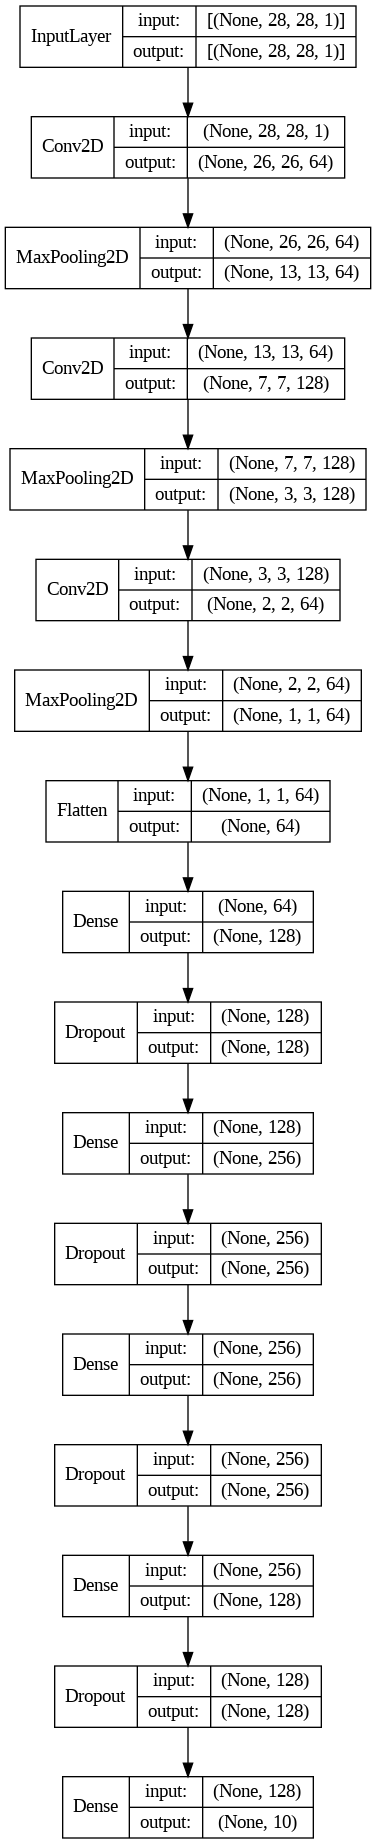

In [ ]:
tf.keras.utils.plot_model(model.model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
# Assuming you have x_train, y_train, x_test, y_test datasets for MNIST
model.fit(x_train, t_train, batch_size=100, epochs=15, validation_data=(x_test, t_test))

loss, accuracy = model.evaluate(x_test, t_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/15
600/600 [==============================] - 17s 7ms/step - loss: 0.7773 - accuracy: 0.7258 - val_loss: 0.4444 - val_accuracy: 0.8389
Epoch 2/15
600/600 [==============================] - 4s 6ms/step - loss: 0.4263 - accuracy: 0.8531 - val_loss: 0.3988 - val_accuracy: 0.8550
Epoch 3/15
600/600 [==============================] - 3s 6ms/step - loss: 0.3689 - accuracy: 0.8719 - val_loss: 0.3636 - val_accuracy: 0.8712
Epoch 4/15
600/600 [==============================] - 3s 5ms/step - loss: 0.3362 - accuracy: 0.8832 - val_loss: 0.3385 - val_accuracy: 0.8792
Epoch 5/15
600/600 [==============================] - 4s 7ms/step - loss: 0.3111 - accuracy: 0.8917 - val_loss: 0.3192 - val_accuracy: 0.8885
Epoch 6/15
600/600 [==============================] - 4s 7ms/step - loss: 0.2954 - accuracy: 0.8954 - val_loss: 0.3496 - val_accuracy: 0.8769
Epoch 7/15
600/600 [==============================] - 3s 6ms/step - loss: 0.2776 - accuracy: 0.9035 - val_loss: 0.3315 - val_accuracy: 0.8770
Epoch

In [ ]:
# Save the model
model.save_model("saved_model.h5")

Model saved successfully.
